<a href="https://colab.research.google.com/github/yk-Jeong/yolov5/blob/master/yolo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. 환경설정

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


### 1. 데이터 준비
Roboflow를 이용해 주사위 데이터를 다운로드

In [ ]:
%cd /content/yolov5/data

/content/yolov5/data


In [ ]:
!pip install utils
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=962c6bc53c5de771ccfa63e3d21144e2c9b3084bd92383382d1f19abcc76ed86
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

In [ ]:
import torch 
from IPython.display import Image, clear_output
from utils.downloads import attempt_download

from roboflow import Roboflow

rf = Roboflow(api_key="qEXkw9jmtxFhbQdR83cM")
project = rf.workspace("roboflow-gw7yv").project("dice")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Dice-2 in yolov5pytorch:: 100%|██████████| 1442/1442 [00:00<00:00, 1517.94it/s]


In [ ]:
# 경로 지정
import os 

root_dir = "/content/yolov5/data/Dice-2"
img_dir = os.path.join(root_dir, "images")
label_dir = os.path.join(root_dir,"labels")

In [ ]:
import glob

data = glob.glob(os.path.join('/content/yolov5/data/Dice-2/export/images/',"*.jpg"))
train = data[:574] # 718 * 0.8 
valid = data[574:]

In [ ]:
# train.txt
with open(os.path.join(root_dir, "train.txt"), 'w') as f:
	f.write('\n'.join(train) + '\n')

# valid.txt
with open(os.path.join(root_dir, "valid.txt"), 'w') as f:
	f.write('\n'.join(valid) + '\n')

In [ ]:
import yaml

yaml_data = {"names":['1', '2', '3', '4', '5', '6'], # 클래스 이름
             "nc":6, # 클래스 수
             "path":root_dir, # root 경로
             "train":os.path.join(root_dir, "train.txt"), # train.txt 경로
             "val":os.path.join(root_dir, "valid.txt"), # valid.txt 경로
             }

with open(os.path.join(root_dir, "data.yaml"), "w") as f:
  yaml.dump(yaml_data, f)

### 2. 모델링

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# train yolov5s on custom data for 10 epochs
!python train.py --img 718 --batch 8 --epochs 10 --data Dice-2/data.yaml --weights yolov5s.pt --name test --cache

train: weights=yolov5s.pt, cfg=, data=Dice-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=718, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=test, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

In [ ]:
!cp -r /content/yolov5/runs/train/test /content/drive/MyDrive/models # 드라이브에 모델 백업

cp: cannot stat '/content/yolov5/runs/train/train15': No such file or directory


### 3. 검출

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/test/weights/best.pt --img 718 --conf 0.25 --source /content/yolov5/data/Dice-2/export/images

detect: weights=['/content/yolov5/runs/train/test/weights/best.pt'], source=/content/yolov5/data/Dice-2/export/images, data=data/coco128.yaml, imgsz=[718, 718], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [718, 718] must be multiple of max stride 32, updating to [736, 736]
image 1/718 /content/yolov5/data/Dice-2/export/images/0BrzNN9qMnzQlQPZ1sso.jpg: 736x576 1 2, 44.3ms
image 2/718 /content

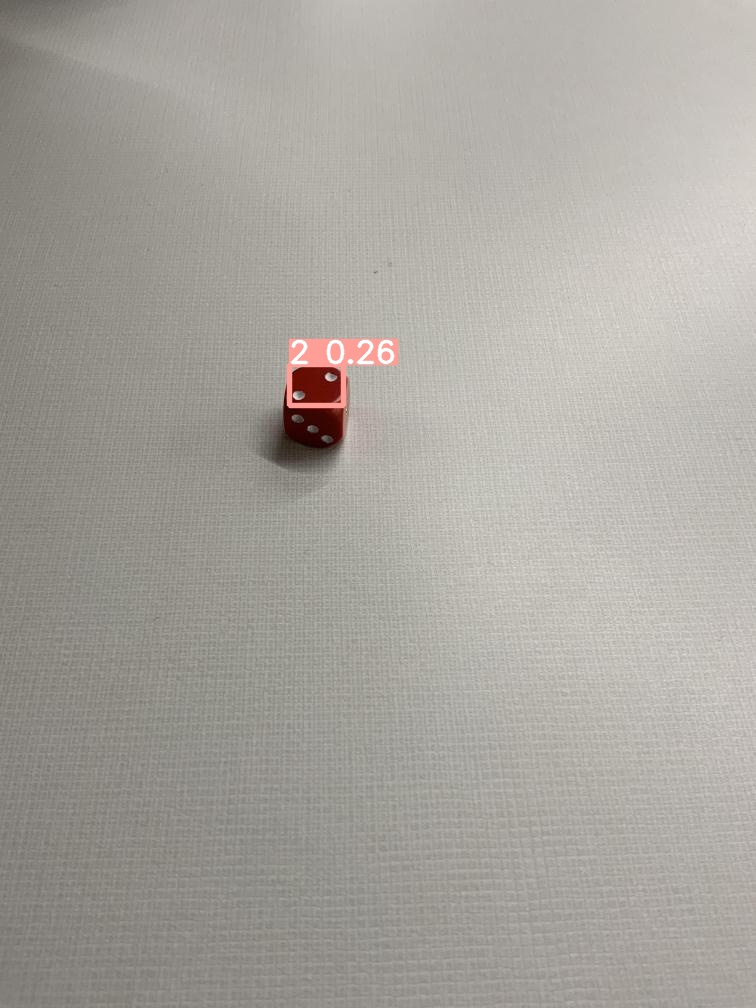

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp2/0BrzNN9qMnzQlQPZ1sso.jpg', width=600)